# `vaex` @ EuroScipy Bilbao 2019

## New York Taxi Dataset (2009-2015): Exploratory Data Analysis and Machine Learning example

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [2]:
import vaex
from vaex.ui.colormaps import cm_plusmin
import warnings; warnings.simplefilter('ignore')


import pylab as plt
import numpy as np
import seaborn as sns

In [3]:
!ls -lh /data

total 1.5T
drwxr-xr-x 2 maartenbreddels maartenbreddels 4.0K Jul  5 10:04 airlines-us
-rw-r--r-- 1 maartenbreddels maartenbreddels 1.2T Jun 30 16:30 gaia-dr2-sort-by-source_id.hdf5
drwxr-xr-x 2 maartenbreddels maartenbreddels 4.0K Jul  6 19:11 GDELT
drwx------ 2 root            root             16K Jun 28 19:58 lost+found
drwxr-xr-x 2 maartenbreddels maartenbreddels 4.0K Jul  8 19:33 misc
-rwxrwxrwx 1 maartenbreddels maartenbreddels 108G May  2 14:16 yellow_taxi_2009_2015_f32.hdf5
-rwxrwxrwx 1 maartenbreddels maartenbreddels 164G Apr 12 21:31 yellow_taxi_2009_2015.hdf5
-rw-r--r-- 1 maartenbreddels maartenbreddels  12G Jul  7 01:03 yellow_taxi_2015_f32.hdf5


In [7]:
df_gaia = vaex.open('/data/gaia-dr2-sort-by-source_id.hdf5')

In [8]:
df_gaia

#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
0,1635721458409799680,b'Gaia DR2 4295806720',4295806720,833719442,2015.5,44.9961536841596,0.119381727827906,0.005615806210679649,0.12287249077395065,0.07144782399869501,0.16248493485095816,0.43971968,11.733411429340324,0.2431241681877592,-4.7759340851709,0.2389884371856387,0.022670548,0.27376112,-0.061221834,0.09342154,-0.43380169999999996,-0.10258209,-0.23457742,0.2862106,0.24838115,0.30606467,107,0,106,1,1.6358627000000001,125.30832,0.0,0.0,31,False,1.6281219999999998,1.6129292688600716,0.03975095740667449,0.026966427,13,10,0.25016737,0,13,False,103,1635.9507708728468,2.7757613305963007,589.3701,17.65394,10,785.6408778060331,8.304744041442405,94.601456,18.113329,11,1205.3932347369573,12.695619867587247,94.9456,17.059097,1.2170502,0,1.0542316,0.45938873,0.5948429000000001,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.9510737567222,-48.901521688994805,42.5337243367526,-16.32957311107743,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1635721458409799680,b'Gaia DR2 34361129088',34361129088,1253687186,2015.5,45.00431616420765,0.13221516031053107,0.021045032689712983,0.15033009946029466,3.48677407917816,0.1943677537725032,17.939056,30.2997273525487,0.2890571540060363,20.102047674607906,0.2904121164006919,0.06490505,0.10328879,-3.8125843e-05,0.010977124,-0.5181503,-0.15682727,-0.25213727,0.25715247,0.36133286,0.21847394,97,0,97,0,3.1044097,139.97816,0.4393295485806768,2.2560181660871423,31,False,1.285051,1.3322381786391089,0.043729691466259976,0.030602371,11,9,0.29393765,0,11,False,96,1712.9128925457007,3.0338739347619077,564.59595,17.604027,11,397.3368347119427,13.369227259151073,29.720254999999998,18.85349,10,2155.4795941459947,8.25350128363993,261.15942,16.428060000000002,1.4903364,0,2.4254303,1.249464,1.1759663,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.94278716312405,-48.88493841774036,42.54656815575859,-16.317213719979975,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1635721458409799680,b'Gaia DR2 38655544960',38655544960,1168973894,2015.5,45.004974244984105,0.029723176168001464,0.019877000365797717,0.0398615194906984,3.1212565825574363,0.04667520041451068,66.87184,29.669773387717747,0.07106567711614904,19.225962799772443,0.08279741152631212,0.11690165,0.2090516,-0.14794418,-0.082815714,-0.6151166,-0.4523399,-0.59776425,0.45273238,0.47702566,0.595477,104,0,104,0,-2.2898765,69.61933,0.0,0.0,31,False,

### Open the dataset

In [9]:
# Opens the data
df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')

# Check length
print(f'Number of samples in the data: {len(df):,}')

Number of samples in the data: 1,173,057,927


In [10]:
# View a portion of the dataset
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.630000114440918,-73.99195861816406,40.72156524658203,nan,nan,-73.99380493164062,40.6959228515625,8.899999618530273,0.5,nan,0.0,0.0,9.399999618530273
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.550000190734863,-73.98210144042969,40.736289978027344,nan,nan,-73.95584869384766,40.768028259277344,12.100000381469727,0.5,nan,2.0,0.0,14.600000381469727
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.350000381469727,-74.0025863647461,40.73974609375,nan,nan,-73.86997985839844,40.770225524902344,23.700000762939453,0.0,nan,4.739999771118164,0.0,28.440000534057617
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.9742660522461,40.79095458984375,nan,nan,-73.9965591430664,40.731849670410156,14.899999618530273,0.5,nan,3.049999952316284,0.0,18.450000762939453
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4000000059604645,-74.00157928466797,40.719383239746094,nan,nan,-74.00837707519531,40.7203483581543,3.700000047683716,0.0,nan,0.0,0.0,3.700000047683716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


### Split the data into train & test sets

In [11]:
# Train / test split (by date)
df_train = df[:1_026_944_937]
df_test = df[1_026_944_937:]

print(f'Number of samples in the training set: {len(df_train):,}')
print(f'Number of samples in the test set:       {len(df_test):,}')

# Check if the lengths of the datasets match
assert len(df) == len(df_test) + len(df_train)

Number of samples in the training set: 1,026,944,937
Number of samples in the test set:       146,112,990


### Basic view in the contents of the data

In [12]:
# Basic description about the training dataset
df_train.describe()
# 9 min

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
dtype,str,datetime64[ns],datetime64[ns],int64,str,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
count,1026944937,1026944937,1026944937,1026944937,1026944937,1026944937,1026944937,1026944936,856048881,492801449,1026930442,1026937251,1026944936,1026944936,885904367,1026944936,1026944936,1026944936
NA,0,0,0,0,0,0,0,1,170896056,534143488,14495,7686,1,1,141040570,1,1,1
mean,--,1970-01-01T00:00:09.363074997,1970-01-01T00:00:17.117798649,1.6849674628660252,--,4.2887783920701805,-72.49317243472608,39.90989106383116,1.0347555456941249,0.01978832452661883,-72.49243151212976,39.90885643799402,10.972378852412822,0.30212644001978256,0.49609965013291546,1.0442341037367946,0.16956585476496344,12.919018626881291
std,--,5.36654e+16,5.36655e+16,1.32989,--,3538.44,13.1757,9.98901,0.390535,0.139272,13.112,9.98311,675.441,0.372003,0.0709658,70.4219,947.702,1166.23
min,--,2009-01-01T00:00:27.365015552,2009-01-01T00:00:27.365015552,0,--,-2.14748e+07,-3509.02,-3579.14,0,0,-3579.14,-3579.14,-2.14748e+07,-19.5,-1,-1.67772e+06,-2.14748e+07,-2.14748e+07
max,--,2014-12-31T23:59:54.563395584,2015-01-01T00:59:27.976185856,255,--,1.62016e+07,3570.22,3577.14,252,2,3460.43,3577.14,158996,854.5,1311.22,938.02,5510.07,685908


### Remove missing data

In [13]:
# Drop NANs
df_train = df_train.dropna(column_names=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'])

### Abnormal number of passengers

In [15]:
# Number of passengers
df_train.passenger_count.value_counts(progress=True)

[########################################]:  100.00% elapsed time  :        1s =  0.0m =  0.0h 
 

1      709330188
2      151963187
5       73984911
3       45300783
4       22002415
6       20490752
0        3870557
208         1515
7            196
9            183
8            132
49            26
10            17
255           10
129            7
213            4
250            3
65             3
15             2
58             2
33             2
169            1
37             1
36             1
34             1
25             1
19             1
17             1
193            1
13             1
         ...    
223            1
225            1
229            1
232            1
247            1
249            1
38             1
51             1
177            1
165            1
164            1
163            1
160            1
158            1
155            1
141            1
137            1
134            1
133            1
125            1
113            1
97             1
91             1
84             1
254            1
69             1
66             1
61            

In [16]:
# Filter abnormal number of passengers
df_train = df_train[(df_train.passenger_count>0) & (df_train.passenger_count<7)]

### Clean up distance values

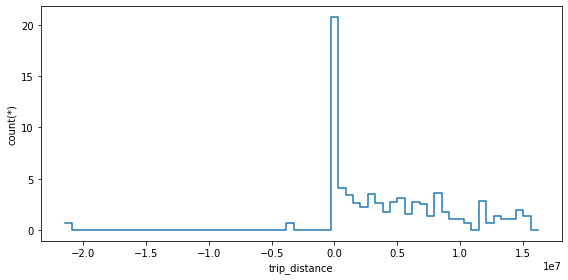

In [17]:
plt.figure(figsize=(8,4))
df_train.plot1d('trip_distance', limits='minmax', f='log1p')
plt.show()

In [18]:
# How many trips have 0.0 distance?
(df_train.trip_distance==0).astype('int').sum()

array(6920779)

In [19]:
# What is the largest distance?
_ = df_train.trip_distance.max()

print(_, 'miles.')

print('This is %3.1f times larger than the distance between the Earth and the Moon!' % (_ / 238_900))
print('or')
print('This is %1.1f the distance to Mars!' % (_ / 33_900_000))

16201631.0 miles.
This is 67.8 times larger than the distance between the Earth and the Moon!
or
This is 0.5 the distance to Mars!


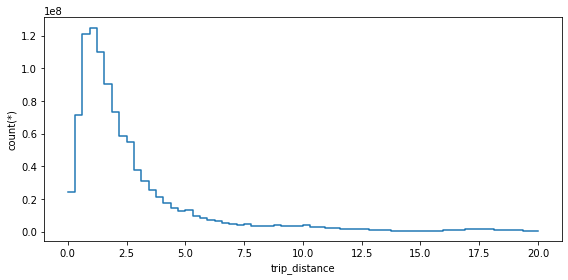

In [20]:
plt.figure(figsize=(8,4))
df_train.plot1d('trip_distance', limits=[0, 20], f=None)
plt.show()

In [21]:
# Filter negative and too large distances
df_train = df_train[(df_train.trip_distance>0) & (df_train.trip_distance<10)]

### What _is_ New York City really?

In [22]:
# Interactively plot the pickup locations
df_train.plot_widget(df_train.pickup_longitude, 
                     df_train.pickup_latitude, 
                     shape=512, 
                     f='log1p', 
                     colormap='plasma', 
                     limits='minmax')

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(scale=LinearScale(allo…

In [23]:
# Define the NYC boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

In [24]:
# Make a selection based on the boundaries
df_train = df_train[(df_train.pickup_longitude > long_min)  & (df_train.pickup_longitude < long_max) & \
        (df_train.pickup_latitude > lat_min)    & (df_train.pickup_latitude < lat_max) & \
        (df_train.dropoff_longitude > long_min) & (df_train.dropoff_longitude < long_max) & \
        (df_train.dropoff_latitude > lat_min)   & (df_train.dropoff_latitude < lat_max)]

### Create some features

In [25]:
# Speed (miles per hour)
df_train['trip_speed_mph'] = df_train.trip_distance / ((df_train.dropoff_datetime - df_train.pickup_datetime) / np.timedelta64(1, 'h'))

# Time in transit (minutes)
df_train['trip_duration_min'] = (df_train.dropoff_datetime - df_train.pickup_datetime) / np.timedelta64(1, 'm')

# fare divided by distance
df_train['fare_by_distance'] = (df_train.fare_amount / df_train.trip_distance).jit_numba()

### More filters: Trip duration

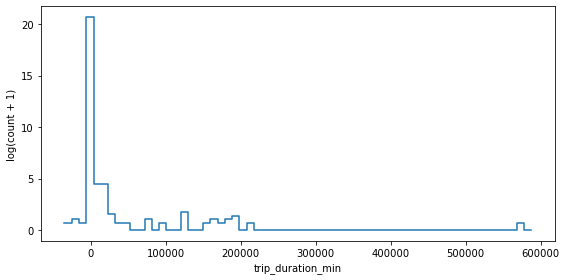

In [26]:
plt.figure(figsize=(8,4))
df_train.plot1d('trip_duration_min', f='log1p', limits='minmax')
plt.ylabel('log(count + 1)')
plt.show()

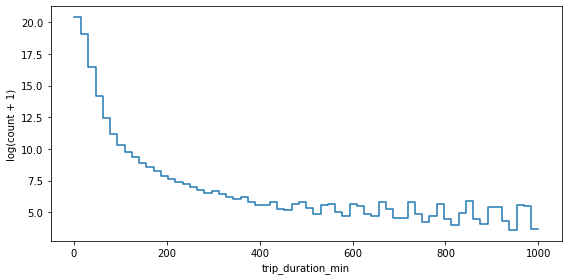

In [27]:
plt.figure(figsize=(8,4))
df_train.plot1d('trip_duration_min', f='log1p', limits=[0, 1000])
plt.ylabel('log(count + 1)')
plt.show()

In [28]:
# Filter, keep durations that are within 2 hours
df_train = df_train[(df_train.trip_duration_min>0) & (df_train.trip_duration_min<120)]

### Create some date/time features

In [29]:
# Daily activities
df_train['pu_hour'] = df_train.pickup_datetime.dt.hour
df_train['pu_day_of_week'] = df_train.pickup_datetime.dt.dayofweek
df_train['pu_month'] = df_train.pickup_datetime.dt.month - 1
df_train['pu_is_weekend'] = (df_train.pu_day_of_week>=5).astype('int')

# lists to help with the labeling
weekday_names_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
month_names_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [30]:
# Treat these columns as label/ordinal encoded values
df_train.categorize(column='pu_hour')
df_train.categorize(column='pu_day_of_week')

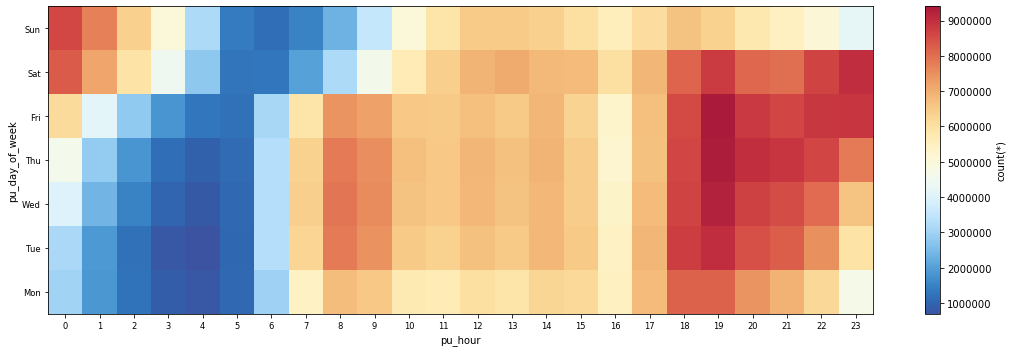

In [31]:
# Number of pick-ups per hour for a given day of the week
df_train.plot('pu_hour', 'pu_day_of_week', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), weekday_names_list)
plt.show()

### Groupby examples

In [32]:
df_per_hour = df_train.groupby(by=df_train.pu_hour).agg({'tip_amount': 'mean',
                                                         'trip_speed_mph': 'mean',
                                                        })

# Display the grouped DataFrame
df_per_hour

#,pu_hour,tip_amount,trip_speed_mph
0,18,0.8980234838056023,11.137734661477356
1,10,0.8399432515403252,11.20425337825429
2,12,0.8089977525043525,10.693505721771535
3,17,0.8611249448688643,11.274521314883266
4,11,0.8204235859855356,10.926674266650382
...,...,...,...
19,1,0.9736288526165442,15.98974841306951
20,3,0.9429588809372405,17.201791052455178
21,14,0.8012740658928521,10.669318573254484
22,6,0.8012954928221264,17.226088364768067


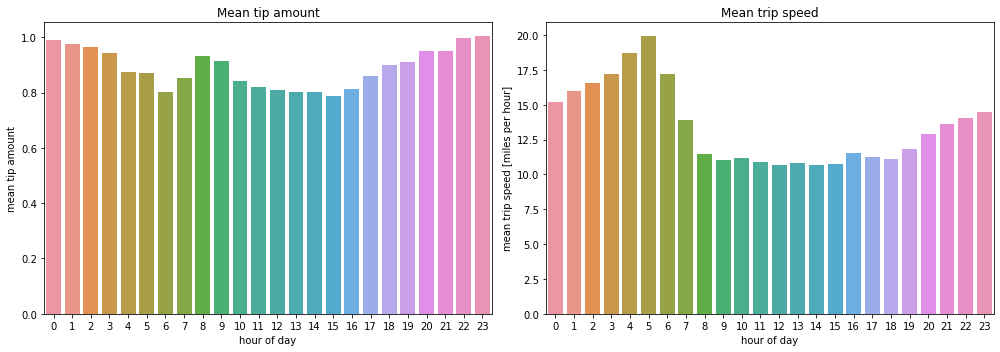

In [34]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.tip_amount.values)
plt.title('Mean tip amount')
plt.xlabel('hour of day')
plt.ylabel('mean tip amount')

plt.subplot(122)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.trip_speed_mph.values)
plt.title('Mean trip speed')
plt.xlabel('hour of day')
plt.ylabel('mean trip speed [miles per hour]')


plt.tight_layout()
plt.show()

In [ ]:
# All the filtering, in case something went wrong
import vaex
import numpy as np
import pylab as plt
df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')
magic_row_nr = 1_026_944_937
df_train, df_test = df[:magic_row_nr], df[magic_row_nr:]
df_train = df_train.dropna(column_names=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'])
df_train = df_train[(df_train.passenger_count>0) & (df_train.passenger_count<7)]
df_train = df_train[(df_train.trip_distance>0) & (df_train.trip_distance<10)]
# Define the NYC boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90
# Make a selection based on the boundaries
df_train = df_train[(df_train.pickup_longitude > long_min)  & (df_train.pickup_longitude < long_max) & \
        (df_train.pickup_latitude > lat_min)    & (df_train.pickup_latitude < lat_max) & \
        (df_train.dropoff_longitude > long_min) & (df_train.dropoff_longitude < long_max) & \
        (df_train.dropoff_latitude > lat_min)   & (df_train.dropoff_latitude < lat_max)]
df_train['pu_hour'] = df_train.pickup_datetime.dt.hour
df_train['pu_day_of_week'] = df_train.pickup_datetime.dt.dayofweek
df_train['pu_month'] = df_train.pickup_datetime.dt.month - 1
df_train['pu_is_weekend'] = (df_train.pu_day_of_week>=5).astype('int')
df_train['trip_speed_mph'] = df_train.trip_distance / ((df_train.dropoff_datetime - df_train.pickup_datetime) / np.timedelta64(1, 'h'))
df_train['trip_duration_min'] = (df_train.dropoff_datetime - df_train.pickup_datetime) / np.timedelta64(1, 'm')
df_train['fare_by_distance'] = (df_train.fare_amount / df_train.trip_distance)


## Predictive modelling example: predict the likely duration of a taxi trip

In [35]:
df_train

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_speed_mph,trip_duration_min,fare_by_distance,pu_hour,pu_day_of_week,pu_month,pu_is_weekend
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.630000114440918,-73.99195861816406,40.72156524658203,nan,nan,-73.99380493164062,40.6959228515625,8.899999618530273,0.5,nan,0.0,0.0,9.399999618530273,15.780000686645508,10.0,3.3840301036834717,2,6,0,1
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.550000190734863,-73.98210144042969,40.736289978027344,nan,nan,-73.95584869384766,40.768028259277344,12.100000381469727,0.5,nan,2.0,0.0,14.600000381469727,39.00000163487026,7.0,2.6593406200408936,3,6,0,1
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.9742660522461,40.79095458984375,nan,nan,-73.9965591430664,40.731849670410156,14.899999618530273,0.5,nan,3.049999952316284,0.0,18.450000762939453,14.263074484944532,21.033333333333335,2.9800000190734863,20,3,0,0
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4000000059604645,-74.00157928466797,40.719383239746094,nan,nan,-74.00837707519531,40.7203483581543,3.700000047683716,0.0,nan,0.0,0.0,3.700000047683716,3.664122192004255,6.55,9.25,16,5,0,1
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2000000476837158,-73.98980712890625,40.73500442504883,nan,nan,-73.98502349853516,40.72449493408203,6.099999904632568,0.5,nan,0.0,0.0,6.599999904632568,9.473684586976702,7.6,5.0833330154418945,22,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"947,290,814",VTS,2014-12-15 19:20:00.000000000,2014-12-15 19:25:00.000000000,2,CSH,0.6600000262260437,-73.95462799072266,40.77800750732422,1.0,nan,-73.96318817138672,40.776947021484375,5.0,1.0,0.5,0.0,0.0,6.5,7.920000314712524,5.0,7.5757575035095215,19,0,11,0
"947,290,815",VTS,2014-12-15 19:21:00.000000000,2014-12-15 19:22:00.000000000,2,CSH,0.029999999329447746,-73.98585510253906,40.75217819213867,1.0,nan,-73.98589324951172,40.75204849243164,3.0,1.0,0.5,0.0,0.0,4.5,1.7999999597668648,1.0,100.0,19,0,11,0
"947,290,816",VTS,2014-12-16 01:45:00.000000000,2014-12-16 01:54:00.000000000,1,CRD,2.680000066757202,-73.9609603881836,40.79698944091797,1.0,nan,-73.98635864257812,40.76822280883789,10.0,0.5,0.5,2.619999885559082,0.0,13.619999885559082,17.866667111714683,9.0,3.7313432693481445,1,1,11,0
"947,290,817",VTS,2014-12-16 02:19:00.000000000,2014-12-16 02:23:00.000000000,1,CSH,1.2699999809265137,-73.98861694335938,40.748661041259766,1.0,nan,-73.98274993896484,40.76218795776367,6.0,0.5,0.5,0.0,0.0,7.0,19.049999713897705,4.0,4.724409580230713,2,1,11,0


In [36]:
import vaex.ml

In [37]:
# arc-distance in miles
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 3958.8

# distance London - Utrecht [miles]
arc_distance(51.5069797, -0.1295992, 52.0842715, 5.0124523)

223.27361155622523

In [38]:
# Add the arc-distance in miles as a virtual column
df_train['arc_distance_miles_numpy'] = arc_distance(df_train.pickup_longitude, df_train.pickup_latitude, 
                                              df_train.dropoff_longitude, df_train.dropoff_latitude)

In [39]:
df_train['arc_distance_miles_numpy'].sum(progress=True)

[########################################]:  100.00% elapsed time  :       19s =  0.3m =  0.0h            
 

array(8.324456e+08, dtype=float32)

In [40]:
df_train['arc_distance_miles_cuda'] = df_train['arc_distance_miles_numpy'].jit_cuda()

In [41]:
df_train['arc_distance_miles_cuda'].sum(progress=True)

[########################################]:  100.00% elapsed time  :        5s =  0.1m =  0.0h          
 

array(8.27308e+08, dtype=float32)

In [42]:
# choose GPU or CPU
df_train['arc_distance_miles'] = df_train['arc_distance_miles_cuda']
# df_train['arc_distance_miles'] = df_train['arc_distance_miles_numpy']

In [43]:
# direction of travel in degrees
def direction_angle(theta_1, phi_1, theta_2, phi_2):
    dtheta = theta_2 - theta_1
    dphi = phi_2 - phi_1
    radians = np.arctan2(dtheta, dphi)
    return np.rad2deg(radians)

# The direction of travel
df_train['direction_angle'] = direction_angle(df_train.pickup_longitude, df_train.pickup_latitude, 
                                           df_train.dropoff_longitude, df_train.dropoff_latitude).jit_numba()

In [44]:
# Examine the train DataFrame at this point 
df_train.head(10)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_speed_mph,trip_duration_min,fare_by_distance,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,15.78,10,3.38403,2,6,0,1,0.504949,0.504949,0.504949,-175.882
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,39,7,2.65934,3,6,0,1,1.91233,1.91233,1.91233,39.5963
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,14.2631,21.0333,2.98,20,3,0,0,1.90838,1.90838,1.90838,-159.335
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,3.66412,6.55,9.25,16,5,0,1,0.470047,0.470047,0.470047,-81.9194
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,9.47368,7.6,5.08333,22,4,0,0,0.386479,0.386479,0.386479,155.526
5,DDS,2009-01-21 08:55:57.000000000,2009-01-21 09:05:42.000000000,1,CREDIT,0.4,-73.984,40.7435,nan,nan,-73.9803,40.7489,5.7,0,nan,1,0,6.7,2.46154,9.75,14.25,8,2,0,0,0.280856,0.280856,0.280856,35.1282
6,VTS,2009-01-04 04:31:00.000000000,2009-01-04 04:36:00.000000000,1,CASH,1.72,-73.9926,40.7484,nan,nan,-73.9956,40.7283,6.1,0.5,nan,0,0,6.6,20.64,5,3.54651,4,6,0,1,0.432931,0.432931,0.432931,-171.647
7,CMT,2009-01-05 16:29:02.000000000,2009-01-05 16:40:21.000000000,1,Credit,1.6,-73.9697,40.7492,nan,nan,-73.9904,40.7511,8.7,0,nan,1.3,0,10,8.48306,11.3167,5.4375,16,0,0,0,1.43216,1.43216,1.43216,-84.9292
8,CMT,2009-01-05 18:53:13.000000000,2009-01-05 18:57:45.000000000,1,Cash,0.7,-73.9552,40.783,nan,nan,-73.9586,40.7748,5.9,0,nan,0,0,5.9,9.26471,4.53333,8.42857,18,0,0,0,0.28401,0.28401,0.28401,-157.378
9,CMT,2009-01-05 08:15:38.000000000,2009-01-05 08:16:44.000000000,1,Cash,0.3,-73.9868,40.7509,nan,nan,-73.9841,40.7514,2.9,0,nan,0,0,2.9,16.3636,1.1,9.66667,8,0,0,0,0.187426,0.187426,0.187426,78.6125


### Encoding and transforming of features

In [45]:
# PCA of the pickup and dropoff locations - helps to "straighten out" the coordinates

# pickup transformations
pca_pu = vaex.ml.PCA(features=['pickup_longitude', 'pickup_latitude'], n_components=2)
df_train = pca_pu.fit_transform(df_train)

# dropoff transformations
pca_do = vaex.ml.PCA(features=['dropoff_longitude', 'dropoff_latitude'], n_components=2)
df_train = pca_do.fit_transform(df_train)

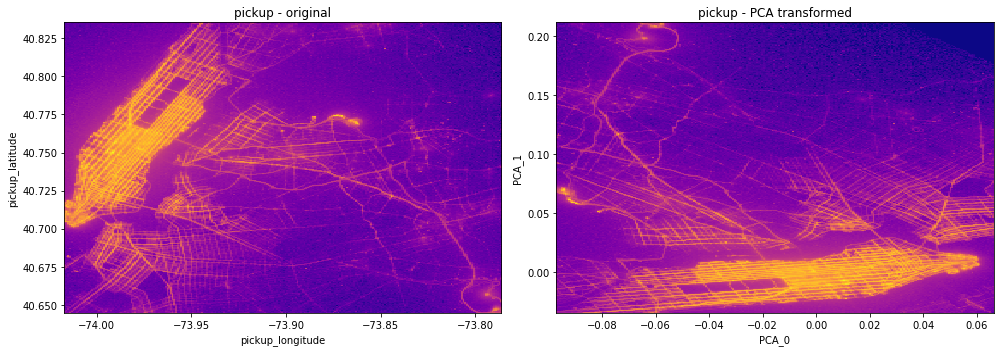

In [46]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.title('pickup - original')
df_train.plot(df_train.pickup_longitude, df_train.pickup_latitude,
           colormap='plasma', f='log1p', shape=256, colorbar=False)

plt.subplot(122)
plt.title('pickup - PCA transformed')
df_train.plot(df_train.PCA_0, df_train.PCA_1,
           colormap='plasma', f='log1p', shape=256, colorbar=False)

plt.tight_layout()
plt.show()

In [47]:
# Inspect the payment_type
df_train.payment_type.str.lower().value_counts(progress=True)

[########################################]:  100.00% elapsed time  :       10s =  0.2m =  0.0h
 

csh          357958192
crd          346001379
cash         118143531
cas           53341764
credit        40950658
cre           28254498
unk             960561
noc             793616
no charge       365536
dis             285498
no              141147
dispute          65914
na               28525
dtype: int64

Inspect the _payment_\__type_
From the documentation provided:
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

In [48]:
# Define a mapping dictionary
map_payment_type = {'csh': 2, 'crd': 1, 'cash': 2, '1': 1, 'cas': 2, '2': 2, 'credit': 1, 'cre': 1, 'unk': 5, 
                    'noc': 3, 'no charge': 3, '3':3, 'dis': 4, 'no ': 3, '4': 4, 'dispute': 4, 'na ': 5, '5':5}

df_train['payment_type_'] = df_train.payment_type.str.lower().map(map_payment_type, 
                                                                  default_value=-1, 
                                                                  allow_missing=True)

In [50]:
# inspect the DataFrame
df_train.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_speed_mph,trip_duration_min,fare_by_distance,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,15.78,10,3.38403,2,6,0,1,0.504949,0.504949,0.504949,-175.882,0.0307305,0.0126052,-0.0546334,-0.0217226,2
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,39,7,2.65934,3,6,0,1,1.91233,1.91233,1.91233,39.5963,0.0133606,0.00910222,0.0255291,-0.0070996,1
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,14.2631,21.0333,2.98,20,3,0,0,1.90838,1.90838,1.90838,-159.335,-0.0307168,-0.0241663,-0.0280609,0.00261305,1
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,3.66412,6.55,9.25,16,5,0,1,0.470047,0.470047,0.470047,-81.9194,0.0390947,0.00737469,-0.0444038,0.00481617,2
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,9.47368,7.6,5.08333,22,4,0,0,0.386479,0.386479,0.386479,155.526,0.0197343,0.00458489,-0.0267306,-0.0110029,2


### Setting up the predictor - `LightGBM`

In [51]:
features_lgbm = ['passenger_count', 'trip_distance', 'rate_code', 'pu_hour', 'pu_day_of_week', 'pu_is_weekend', 
                 'arc_distance_miles', 'direction_angle', 'PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'payment_type_']


# the target
target = 'trip_duration_min'

In [52]:
# Import the modeling library
import vaex.ml.lightgbm # vaex.ml also supports XGBoost, CatBoost, scikit-learn, annoy, more to come)

In [53]:
# parameters - standard lightgbm options
params = {
    'learning_rate': 0.1,       
    'max_depth': 5,             
    'colsample_bytree': 0.8,
    'subsample': 0.8,           
    'reg_lambda': 1,            
    'reg_alpha': 0,             
    'min_child_weight': 1,      
    'objective': 'regression',  
    'random_state': 42,         
    'n_jobs': -1} 

# Instantiate the model object
booster = vaex.ml.lightgbm.LightGBMModel(features=features_lgbm, params=params, num_boost_round=100)

# Take small part of the training set to we can do the training in real time fast
df_train_mini = df_train[:1_000_000]

# Fit the model object
booster.fit(df_train_mini, target=target)

print('Training completed!')

Training completed!


In [54]:
# Check performance on the training set - in reality one needs to do proper (x)-validation

# Classical predict - get an in-memory array of the predictions
pred = booster.predict(df_train_mini)

# view the predictions
display(pred)

# Create a virtual column housing the predictions
df_train = booster.transform(df_train)

# view the DataFrame
df_train.head(5)

array([10.31321343, 11.55018209, 19.73383297, ...,  9.10644488,
        6.42894891, 14.51054095])

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_speed_mph,trip_duration_min,fare_by_distance,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_,lightgbm_prediction
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,15.78,10,3.38403,2,6,0,1,0.504949,0.504949,0.504949,-175.882,0.0307305,0.0126052,-0.0546334,-0.0217226,2,10.3132
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,39,7,2.65934,3,6,0,1,1.91233,1.91233,1.91233,39.5963,0.0133606,0.00910222,0.0255291,-0.0070996,1,11.5502
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,14.2631,21.0333,2.98,20,3,0,0,1.90838,1.90838,1.90838,-159.335,-0.0307168,-0.0241663,-0.0280609,0.00261305,1,19.7338
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,3.66412,6.55,9.25,16,5,0,1,0.470047,0.470047,0.470047,-81.9194,0.0390947,0.00737469,-0.0444038,0.00481617,2,4.30183
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,9.47368,7.6,5.08333,22,4,0,0,0.386479,0.386479,0.386479,155.526,0.0197343,0.00458489,-0.0267306,-0.0110029,2,8.9789


In [55]:
# Check the performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_train_score = mean_absolute_error(df_train_mini.trip_duration_min.values, pred)
mse_train_score = mean_squared_error(df_train_mini.trip_duration_min.values, pred)

print('The mean absolute error is %2.3f' % mae_train_score)
print('The mean squared score is %2.3f' % mse_train_score)

The mean absolute error is 2.317
The mean squared score is 13.226


### Second estimator?!

In [56]:
# One hot encoding of categorical features
one_hot_enc = vaex.ml.OneHotEncoder(features=['payment_type_', 
                                              'pu_hour', 'pu_day_of_week', 'pu_month'], prefix='onehot_')

df_train = one_hot_enc.fit_transform(df_train)

In [57]:
# Standard scale some of the numerical features
standard_scaler = vaex.ml.StandardScaler(features=['arc_distance_miles', 'direction_angle', 'trip_distance'])
df_train = standard_scaler.fit_transform(df_train)

In [58]:
# Try a linear model
import vaex.ml.sklearn
from sklearn.linear_model import LinearRegression

In [59]:
# Specify which features to use
features_linear = ['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'pu_is_weekend'] + \
                  [feature for feature in df_train.get_column_names() if 'standard_scaled_' in feature] + \
                  [feature for feature in df_train.get_column_names() if 'onehot_' in feature]

In [60]:
# Instantiate the vaex-sklearn model 
linear_model = vaex.ml.sklearn.SKLearnPredictor(model=LinearRegression(copy_X=False, n_jobs=-1), 
                                                features=features_linear, prediction_name='linear_prediction')

# Agaom, take small part of the training so we can train in real time.
df_train_mini = df_train[:1_000_000]


# Fit the model object
linear_model.fit(df_train_mini, target=target)

print('Training completed!')

Training completed!


In [61]:
# Check performance on the training set - in reality one needs to do proper (x)-validation

# Classical predict - get an in-memory array of the predictions
pred_linear = linear_model.predict(df_train_mini)

# view the predictions
display(pred_linear)

# Create a virtual column housing the predictions
df_train = linear_model.transform(df_train)

# view the DataFrame 
df_train.head(5)

array([ 9.09023565, 13.08232558, 18.55664033, ...,  9.6434135 ,
        7.96064326, 11.91514918])

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_speed_mph,trip_duration_min,fare_by_distance,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_,lightgbm_prediction,onehot_payment_type__1,onehot_payment_type__2,onehot_payment_type__3,onehot_payment_type__4,onehot_payment_type__5,onehot_pu_hour_0,onehot_pu_hour_1,onehot_pu_hour_2,onehot_pu_hour_3,onehot_pu_hour_4,onehot_pu_hour_5,onehot_pu_hour_6,onehot_pu_hour_7,onehot_pu_hour_8,onehot_pu_hour_9,onehot_pu_hour_10,onehot_pu_hour_11,onehot_pu_hour_12,onehot_pu_hour_13,onehot_pu_hour_14,onehot_pu_hour_15,onehot_pu_hour_16,onehot_pu_hour_17,onehot_pu_hour_18,onehot_pu_hour_19,onehot_pu_hour_20,onehot_pu_hour_21,onehot_pu_hour_22,onehot_pu_hour_23,onehot_pu_day_of_week_0,onehot_pu_day_of_week_1,onehot_pu_day_of_week_2,onehot_pu_day_of_week_3,onehot_pu_day_of_week_4,onehot_pu_day_of_week_5,onehot_pu_day_of_week_6,onehot_pu_month_0,onehot_pu_month_1,onehot_pu_month_2,onehot_pu_month_3,onehot_pu_month_4,onehot_pu_month_5,onehot_pu_month_6,onehot_pu_month_7,onehot_pu_month_8,onehot_pu_month_9,onehot_pu_month_10,onehot_pu_month_11,standard_scaled_arc_distance_miles,standard_scaled_direction_angle,standard_scaled_trip_distance,linear_prediction
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,15.78,10,3.38403,2,6,0,1,0.504949,0.504949,0.504949,-175.882,0.0307305,0.0126052,-0.0546334,-0.0217226,2,10.3132,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.614417,-1.56023,0.189254,9.09024
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,39,7,2.65934,3,6,0,1,1.91233,1.91233,1.91233,39.5963,0.0133606,0.00910222,0.0255291,-0.0070996,1,11.5502,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.490347,0.537361,1.22485,13.0823
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,14.2631,21.0333,2.98,20,3,0,0,1.90838,1.90838,1.90838,-159.335,-0.0307168,-0.0241663,-0.0280609,0.00261305,1,19.7338,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.487246,-1.39915,1.46757,18.5566
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,3.66412,6.55,9.25,16,5,0,1,0.470047,0.470047,0.470047,-81.9194,0.0390947,0.00737469,-0.0444038,0.00481617,2,4.30183,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.641814,-0.645546,-1.01355,6.25763
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,9.47368,7.6,5.08333,22,4,0,0,0.386479,0.386479,0.386479,155.526,0.0197343,0.00458489,-0.0267306,-0.0110029,2,8.9789,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.707412,1.66589,-0.582053,7.74905


In [ ]:
mae_train_score = mean_absolute_error(df_train_mini.trip_duration_min.values, pred_linear)
mse_train_score = mean_squared_error(df_train_mini.trip_duration_min.values, pred_linear)

print('The mean absolute error is %2.3f' % mae_train_score)
print('The mean squared score is %2.3f' % mse_train_score)

### Ensemble?!

In [62]:
# Average the predictions from the Gradient Boosting and Linear models
df_train['final_prediction'] = (df_train.lightgbm_prediction + df_train.linear_prediction) / 2

In [63]:
### Display the DataFrame
df_train.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_speed_mph,trip_duration_min,fare_by_distance,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_,lightgbm_prediction,onehot_payment_type__1,onehot_payment_type__2,onehot_payment_type__3,onehot_payment_type__4,onehot_payment_type__5,onehot_pu_hour_0,onehot_pu_hour_1,onehot_pu_hour_2,onehot_pu_hour_3,onehot_pu_hour_4,onehot_pu_hour_5,onehot_pu_hour_6,onehot_pu_hour_7,onehot_pu_hour_8,onehot_pu_hour_9,onehot_pu_hour_10,onehot_pu_hour_11,onehot_pu_hour_12,onehot_pu_hour_13,onehot_pu_hour_14,onehot_pu_hour_15,onehot_pu_hour_16,onehot_pu_hour_17,onehot_pu_hour_18,onehot_pu_hour_19,onehot_pu_hour_20,onehot_pu_hour_21,onehot_pu_hour_22,onehot_pu_hour_23,onehot_pu_day_of_week_0,onehot_pu_day_of_week_1,onehot_pu_day_of_week_2,onehot_pu_day_of_week_3,onehot_pu_day_of_week_4,onehot_pu_day_of_week_5,onehot_pu_day_of_week_6,onehot_pu_month_0,onehot_pu_month_1,onehot_pu_month_2,onehot_pu_month_3,onehot_pu_month_4,onehot_pu_month_5,onehot_pu_month_6,onehot_pu_month_7,onehot_pu_month_8,onehot_pu_month_9,onehot_pu_month_10,onehot_pu_month_11,standard_scaled_arc_distance_miles,standard_scaled_direction_angle,standard_scaled_trip_distance,linear_prediction,final_prediction
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,15.78,10,3.38403,2,6,0,1,0.504949,0.504949,0.504949,-175.882,0.0307305,0.0126052,-0.0546334,-0.0217226,2,10.3132,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.614417,-1.56023,0.189254,9.09024,9.70172
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,39,7,2.65934,3,6,0,1,1.91233,1.91233,1.91233,39.5963,0.0133606,0.00910222,0.0255291,-0.0070996,1,11.5502,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.490347,0.537361,1.22485,13.0823,12.3163
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,14.2631,21.0333,2.98,20,3,0,0,1.90838,1.90838,1.90838,-159.335,-0.0307168,-0.0241663,-0.0280609,0.00261305,1,19.7338,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.487246,-1.39915,1.46757,18.5566,19.1452
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,3.66412,6.55,9.25,16,5,0,1,0.470047,0.470047,0.470047,-81.9194,0.0390947,0.00737469,-0.0444038,0.00481617,2,4.30183,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.641814,-0.645546,-1.01355,6.25763,5.27973
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,9.47368,7.6,5.08333,22,4,0,0,0.386479,0.386479,0.386479,155.526,0.0197343,0.00458489,-0.0267306,-0.0110029,2,8.9789,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.707412,1.66589,-0.582053,7.74905,8.36398


In [ ]:
mae_train_score = mean_absolute_error(df_train[:1_000_000].trip_duration_min.values, 
                                      df_train[:1_000_000].final_prediction.values)
mse_train_score = mean_squared_error(df_train[:1_000_000].trip_duration_min.values, 
                                     df_train[:1_000_000].final_prediction.values)

print('The mean absolute error is %2.3f' % mae_train_score)
print('The mean squared score is %2.3f' % mse_train_score)

### So what about a pipeline?

## The `vaex` `state` – all the pipeline you need!

In [64]:
# Save the state to disk
state = df_train.state_write('./taxi_ml_state.json')